## Census Income Prediction

In [169]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 

In [170]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [171]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [172]:
len(df.columns)

15

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [174]:
df.shape

(32561, 15)

In [175]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: xlabel='income', ylabel='count'>

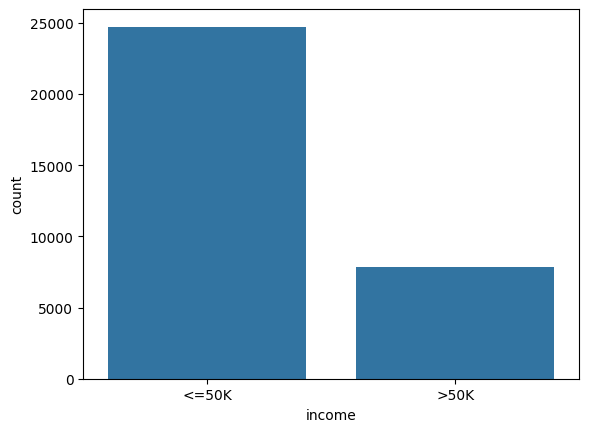

In [176]:
sns.countplot(x='income',data=df )

In [177]:
df["income"].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [178]:
print(f"<= 50k : {round(24720 /32561 * 100 , 2)}")
print(f"> 50k : {round(7841 /32561 * 100 , 2)}")

<= 50k : 75.92
> 50k : 24.08


## EDA

In [179]:
# Finding missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [180]:
numerical = [i for i in df.columns if df[i].dtypes != "O"]

In [181]:
numerical

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [182]:
for i in numerical:
    print(f" {i}  :  {len(df[i].unique())}")

 age  :  73
 fnlwgt  :  21648
 education.num  :  16
 capital.gain  :  119
 capital.loss  :  92
 hours.per.week  :  94


In [183]:
df["education.num"].unique()

array([ 9, 10,  4,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1],
      dtype=int64)

C:\Users\enaxdee\AppData\Local\Temp\ipykernel_31328\4183027030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(df[feature] , kde_kws = {'bw' : 1})
C:\Users\enaxdee\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


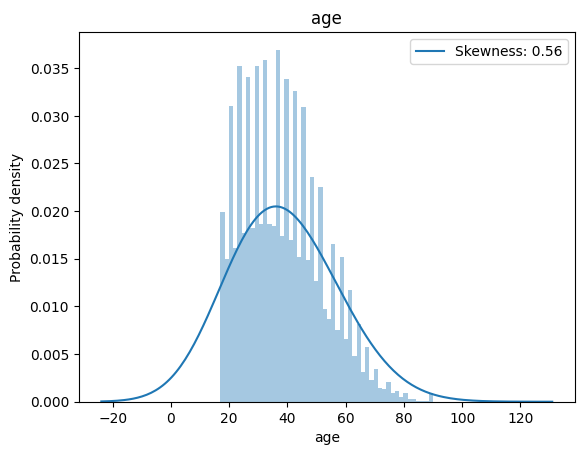

C:\Users\enaxdee\AppData\Local\Temp\ipykernel_31328\4183027030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(df[feature] , kde_kws = {'bw' : 1})
C:\Users\enaxdee\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


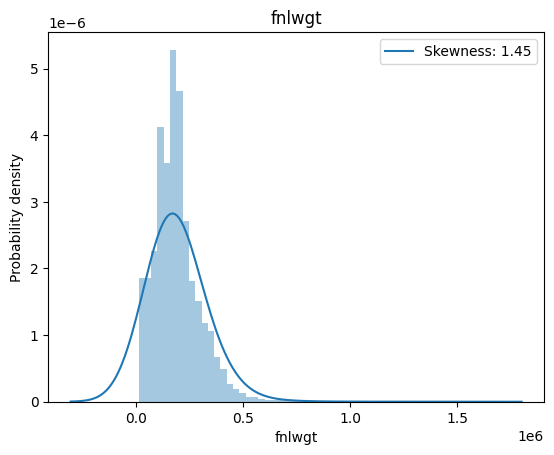

C:\Users\enaxdee\AppData\Local\Temp\ipykernel_31328\4183027030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(df[feature] , kde_kws = {'bw' : 1})
C:\Users\enaxdee\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


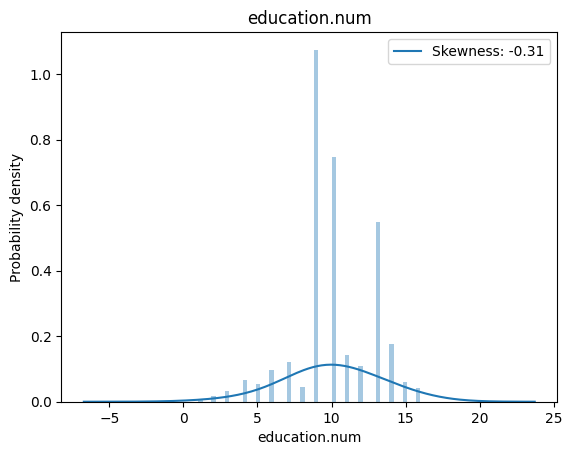

C:\Users\enaxdee\AppData\Local\Temp\ipykernel_31328\4183027030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(df[feature] , kde_kws = {'bw' : 1})
C:\Users\enaxdee\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


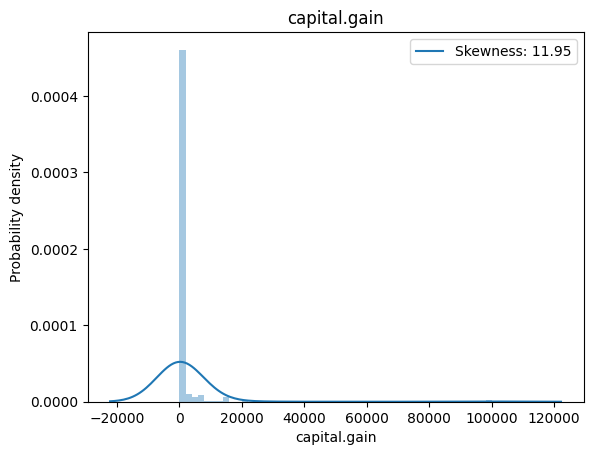

C:\Users\enaxdee\AppData\Local\Temp\ipykernel_31328\4183027030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(df[feature] , kde_kws = {'bw' : 1})
C:\Users\enaxdee\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


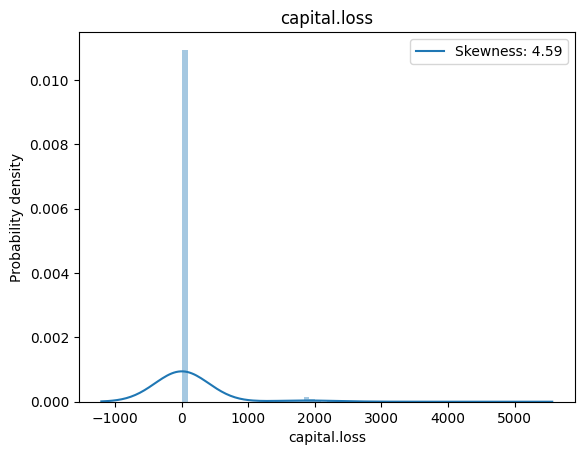

C:\Users\enaxdee\AppData\Local\Temp\ipykernel_31328\4183027030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(df[feature] , kde_kws = {'bw' : 1})
C:\Users\enaxdee\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


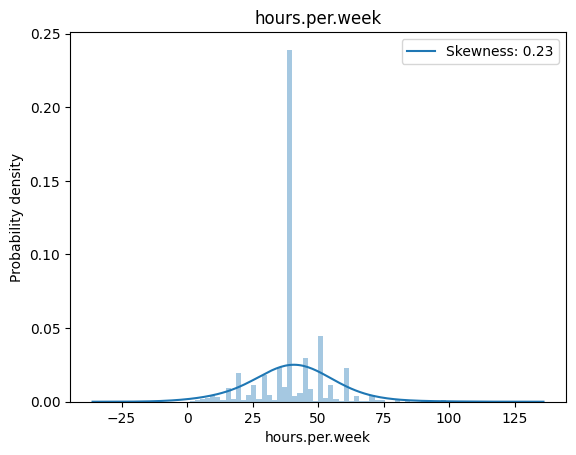

In [184]:
for feature in numerical:
    bar = sns.distplot(df[feature] , kde_kws = {'bw' : 1})
    bar.legend(["Skewness: {:0.2f}".format(df[feature].skew())])
    plt.xlabel(feature)
    plt.ylabel("Probability density")
    plt.title(feature)
    plt.show()

In [185]:
df["age"] = np.log(df["age"])
df["fnlwgt"] = np.log(df["fnlwgt"])

In [186]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

## Handling categorical data 

In [187]:
categorical = [i for i in df.columns if df[i].dtypes == "O"]

In [188]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

 workclass  :  9
 education  :  16
 marital.status  :  7
 occupation  :  15
 relationship  :  6
 race  :  5
 sex  :  2
 native.country  :  42
 income  :  2


In [189]:
for feature in  categorical:
    print(df[feature].value_counts()) 
    print("\n \n ")

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

 
 
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

 
 
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

 
 
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-cleri

## Handling missing values 

In [190]:
print(f"workclass : {round(2093 / 32561 , 4) *100}%")
print(f"occupation : {round(1843 / 32561 , 4) *100}%")
print(f"native.country : {round(583 / 32561 , 4) *100}%")

workclass : 6.43%
occupation : 5.66%
native.country : 1.79%


In [191]:
df["occupation"].mode()[0]

'Prof-specialty'

In [192]:
df['workclass'] = df['workclass'].str.replace('?', 'Private' )
df['occupation'] = df['occupation'].str.replace('?', 'Prof-specialty' )
df['native.country'] = df['native.country'].str.replace('?', 'United-States' )

C:\Users\enaxdee\AppData\Local\Temp\ipykernel_31328\744940442.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['workclass'] = df['workclass'].str.replace('?', 'Private' )
C:\Users\enaxdee\AppData\Local\Temp\ipykernel_31328\744940442.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['occupation'] = df['occupation'].str.replace('?', 'Prof-specialty' )
C:\Users\enaxdee\AppData\Local\Temp\ipykernel_31328\744940442.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['native.country'] = df['native.country'].str.r

In [193]:
# education Category
df["education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,
                         inplace = True , regex = True)
df["education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True , regex = True)

In [194]:
#martial status
df['marital.status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace = True , regex = True)
df['marital.status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other' , inplace = True , regex = True)

In [195]:
# income
df["income"] = df["income"].replace({'<=50K' : 0 , ">50K" : 1 } , regex = True)

In [196]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,4.499810,Private,11.252249,HS-grad,9,other,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,4.406719,Private,11.797126,HS-grad,9,other,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,4.189655,Private,12.133830,higher,10,other,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,3.988984,Private,11.851959,school,4,other,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,3.713572,Private,12.486213,higher,10,other,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [197]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

 workclass  :  8
 education  :  6
 marital.status  :  3
 occupation  :  14
 relationship  :  6
 race  :  5
 sex  :  2
 native.country  :  41
 income  :  2


In [198]:
df["education"].unique()

array(['HS-grad', 'higher', 'school', 'Doctorate', 'Bachelors', 'Masters'],
      dtype=object)

C:\Users\enaxdee\AppData\Local\Temp\ipykernel_31328\3895644356.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


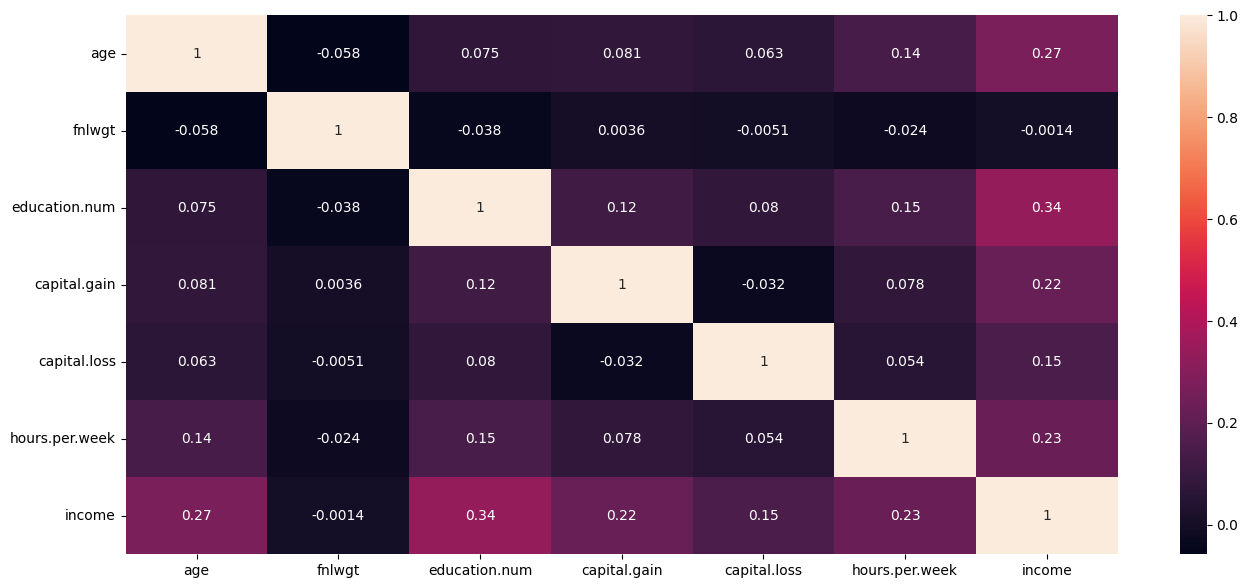

In [199]:
plt.figure(figsize = (16 , 7))
sns.heatmap(df.corr(), annot=True);

In [200]:
from sklearn.preprocessing import  LabelEncoder

In [201]:
df = df.apply(LabelEncoder().fit_transform)
df .head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,72,3,2649,2,8,2,9,1,4,0,0,91,39,38,0
1,65,3,6514,2,8,2,3,1,4,0,0,91,17,38,0
2,49,3,11175,4,9,2,9,4,2,0,0,91,39,38,0
3,37,3,7009,5,3,2,6,4,4,0,0,90,39,38,0
4,24,3,16850,4,9,2,9,3,4,0,0,90,39,38,0


## Start training the data

In [202]:
x = df.iloc[:,:-1]
y = df["income"]

In [203]:
len(y)

32561

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2) 

In [205]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [206]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Logistic Regression

In [207]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train, Y_train)
prediction = lr.predict(X_test)
accuracy_score(Y_test, prediction)

0.7703055427606326

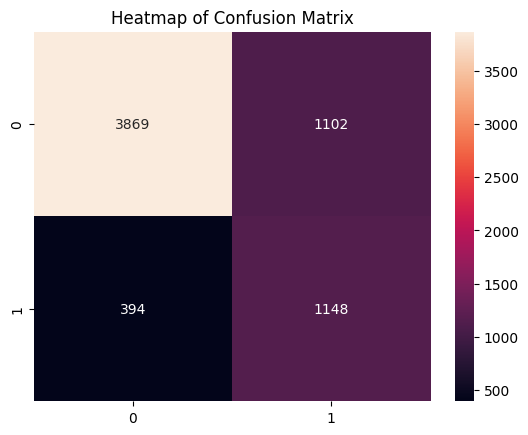

In [208]:
cm = confusion_matrix(Y_test, prediction )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [209]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      4971
           1       0.51      0.74      0.61      1542

    accuracy                           0.77      6513
   macro avg       0.71      0.76      0.72      6513
weighted avg       0.81      0.77      0.78      6513



## Random Forest

In [210]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy' ,random_state = 51)
rf_classifier.fit(X_train, Y_train)
Y_pred = rf_classifier.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.85014586212191

In [211]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4971
           1       0.72      0.59      0.65      1542

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



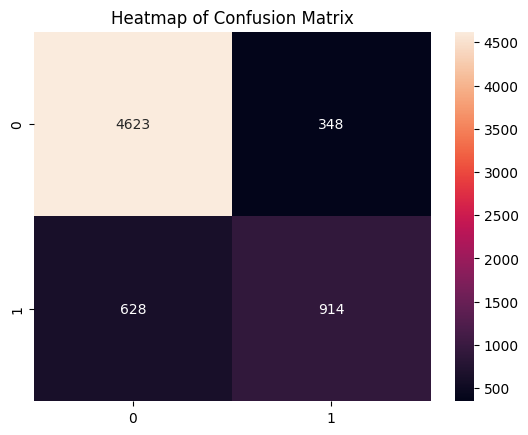

In [212]:
cm = confusion_matrix(Y_test, Y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

## Hyperparameter tuning  with random forest

In [213]:
params={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':[1,2,3],
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf': [1,2,3,4],
              }

In [214]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3 ,random_state = 23)
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                                    n_estimators=20,
                                                    random_state=51),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': [1, 2, 3],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500]},
                   random_state=23, scoring='roc_auc', verbose=3)

In [215]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 2,
 'max_features': 3,
 'max_depth': 10,
 'criterion': 'entropy',
 'bootstrap': False}

In [216]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       max_features=3, min_samples_leaf=2, n_estimators=200,
                       random_state=51)

In [217]:
rf_classifier = RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       criterion='entropy', max_depth=10, max_features=3,
                       min_samples_leaf=2, n_estimators=200, random_state=51)
rf_classifier.fit(X_train, Y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.85014586212191

In [218]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4971
           1       0.72      0.59      0.65      1542

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



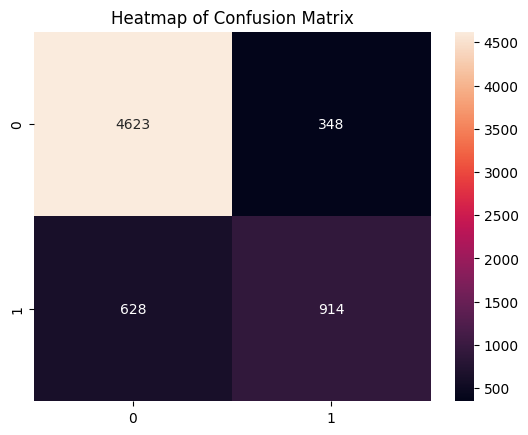

In [219]:
cm = confusion_matrix(Y_test, Y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()